### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the datasets
transactional = pd.read_csv('data/transactional_data (1).csv', sep=';')
exams = pd.read_csv('data/exams_data.csv')
demographic = pd.read_csv('data/DemographicData_ZCTAs.csv')
geocodes = pd.read_csv('data/df_geocode (1).csv')
economic = pd.read_csv('data/EconomicData_ZCTAs (1).csv')

# EDA

## Transactional

Registros de exames feitos por pacientes da rede em cada laboratório

In [2]:

print(transactional.info())

transactional.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Patient Id       object
 1   Gender           object
 2   Date of birth    object
 3   Date of service  object
 4   Service Id       object
 5   Lab Id           object
 6   CodItem          int64 
 7   Testing Cost     object
dtypes: int64(1), object(7)
memory usage: 143.8+ MB
None


,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [3]:
transactional.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(10)



,column_name,null_count
2,Date of birth,1
0,Patient Id,0
1,Gender,0
3,Date of service,0
4,Service Id,0
5,Lab Id,0
6,CodItem,0
7,Testing Cost,0


In [4]:
transactional.nunique().reset_index().rename(columns={0: 'unique_count', 'index': 'column_name'})\
    .sort_values('unique_count', ascending=False).head(10)

,column_name,unique_count
4,Service Id,660059
0,Patient Id,501446
2,Date of birth,32914
6,CodItem,2063
3,Date of service,770
7,Testing Cost,495
5,Lab Id,118
1,Gender,3


#### Date of birth

In [5]:
transactional[transactional['Date of birth'].isnull()]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
1253947,7659985004-1,F,NaN,2020-02-22,7659985004-2-1,L152,70000107,"48,0"


Como é apenas um caso isolado, provavelmente vou remover essa linha no futuro


#### Genero

<Axes: xlabel='Gender'>

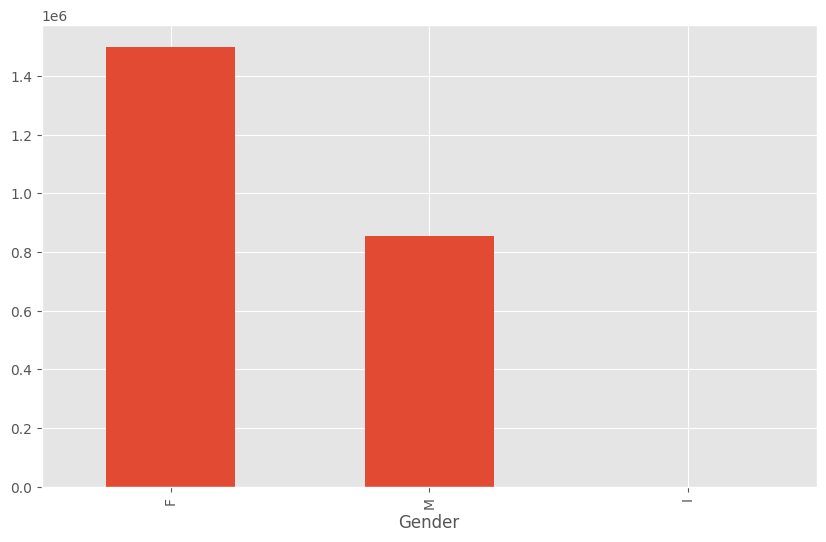

In [6]:
transactional['Gender'].value_counts().plot(kind='bar')

Observamos que o senso comum que mulheres tendem a cuidar mais da saúde se aplica aqui

#### Testing Cost

In [7]:
transactional['Testing Cost'] = transactional['Testing Cost'].replace({',': '.'}, regex=True).astype(float)

transactional['Testing Cost'].describe()

count   2355241.00
mean         51.13
std          97.83
min           0.00
25%          11.00
50%          24.00
75%          49.00
max        9500.00
Name: Testing Cost, dtype: float64

In [8]:
transactional.sort_values('Testing Cost', ascending=False).head(20)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
1078870,7658190136-1,F,27/03/1994 00:00:00,2019-10-30,7658190136-2-1,L170,70003713,9500.00
934526,7658949749-1,F,30/10/2018 00:00:00,2019-10-30,7658949749-1-1,L172,70003713,9500.00
971752,7600739366-1,M,15/05/2015 00:00:00,2019-12-03,7600739366-2-1,L537,70003713,9500.00
161614,7657797382-1,F,14/05/1991 00:00:00,2019-03-13,7657797382-2-1,L171,70008010,7250.00
105670,9999999-1,F,01/01/2010 00:00:00,2019-03-08,9999999-2237-1,L121,70008010,7250.00
161618,7657797382-1,F,14/05/1991 00:00:00,2019-03-13,7657797382-2-1,L171,70008011,7250.00
351014,7657588374-1,F,03/09/1990 00:00:00,2019-05-09,7657588374-263-1,L121,70008011,7250.00
105609,9999999-1,F,01/01/2010 00:00:00,2019-02-20,9999999-2194-1,L121,70008011,7250.00
351017,7657588374-1,F,03/09/1990 00:00:00,2019-05-09,7657588374-263-1,L121,70008010,7250.00
161627,7657797382-1,F,14/05/1991 00:00:00,2019-03-13,7657797382-2-1,L171,70008013,6050.00


Os testes com valores altissimos parecem ser testes reais mas vou ver mais sobre oque se tratam no arquivo de exames

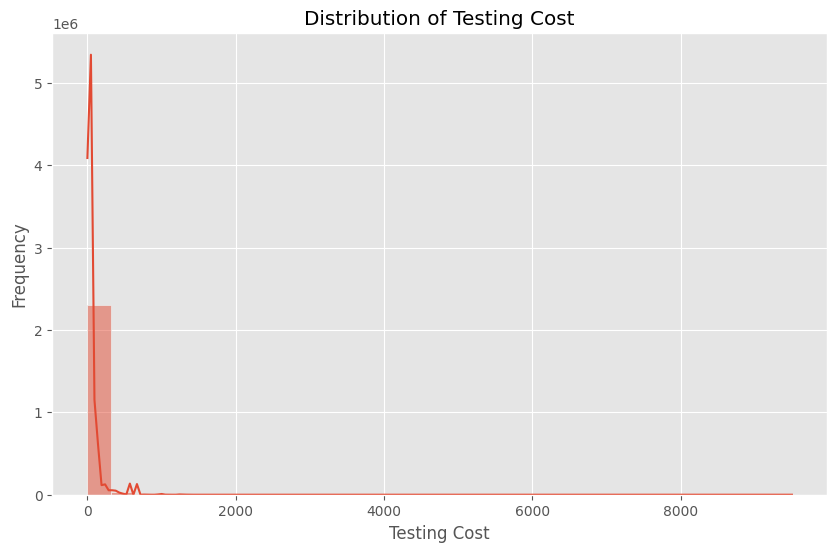

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(transactional['Testing Cost'], bins=30, kde=True)
plt.title('Distribution of Testing Cost')
plt.xlabel('Testing Cost')
plt.ylabel('Frequency')
plt.show()

In [10]:
mean_testing_costs = transactional.groupby('CodItem')['Testing Cost'].mean().reset_index()
mean_testing_costs = mean_testing_costs.rename(columns={'Testing Cost': 'Mean Testing Cost'})
mean_testing_costs = mean_testing_costs.sort_values('Mean Testing Cost', ascending=False)   

print(mean_testing_costs['CodItem'].head(10).to_list())
print(mean_testing_costs['CodItem'].tail(10).to_list())

[70003713, 70008010, 70008011, 70008012, 70008013, 70007907, 70003490, 70008014, 70008017, 70008016]
[70007610, 70007608, 70007415, 70007628, 70007629, 70007750, 70007926, 70007896, 70004579, 70008046]


Vou salvar esses 10 registros mais caros e mais baratos para analisar com a base de exames depois

#### Date of Birth e Date of Service 

In [11]:
# Converter Date of Birth que esta no formato objeto 01/08/1976 00:00:00 para datetime
transactional['Date of birth'] = pd.to_datetime(transactional['Date of birth'], format='%d/%m/%Y %H:%M:%S')
transactional['Date of birth'].describe()

count                          2355240
mean     1978-02-11 12:15:39.209252512
min                1859-12-28 00:00:00
25%                1965-04-12 00:00:00
50%                1977-08-29 00:00:00
75%                1989-08-26 00:00:00
max                2020-02-08 00:00:00
Name: Date of birth, dtype: object

In [12]:
# Converter Date of service que esta no formato objeto 2019-01-17 para datetime
transactional['Date of service'] = pd.to_datetime(transactional['Date of service'], format='%Y-%m-%d')
transactional['Date of service'].describe()

count                          2355241
mean     2020-01-12 11:36:46.424395264
min                2019-01-01 00:00:00
25%                2019-07-11 00:00:00
50%                2020-01-15 00:00:00
75%                2020-07-12 00:00:00
max                2021-02-12 00:00:00
Name: Date of service, dtype: object

In [13]:
# Criar a coluna Age_at_service com a idade do paciente na data do serviço
transactional['Age_at_service'] = (transactional['Date of service'] - transactional['Date of birth']).dt.days // 365
transactional['Age_at_service'].describe()

count   2355240.00
mean         41.45
std          17.50
min           0.00
25%          30.00
50%          42.00
75%          54.00
max         159.00
Name: Age_at_service, dtype: float64

In [14]:
transactional.sort_values('Age_at_service', ascending=False).head(20)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age_at_service
830128,10225811036-BIO002,M,1859-12-28,2019-09-19,574604575219-67,L152,70004795,264.00,159.00
1670364,6162950424-1,F,1900-01-01,2020-04-05,6162950424-1-1,L139,70004461,94.00,120.00
356632,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70002619,12.00,119.00
356634,-2,I,1900-01-01,2019-05-04,571904995402-38,L133,70003239,47.00,119.00
356628,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70000301,12.00,119.00
356629,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70001276,53.00,119.00
85068,-2,I,1900-01-01,2019-02-22,532800338922-132,L069,70003759,14.00,119.00
356630,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70004134,10.00,119.00
356633,-2,I,1900-01-01,2019-05-04,571904995402-38,L133,70002141,47.00,119.00
356631,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70003200,9.00,119.00


Claramente há algum erro nessa linhas que marcam datas muito antigas, vou resolver que criterio usar para removelas depois

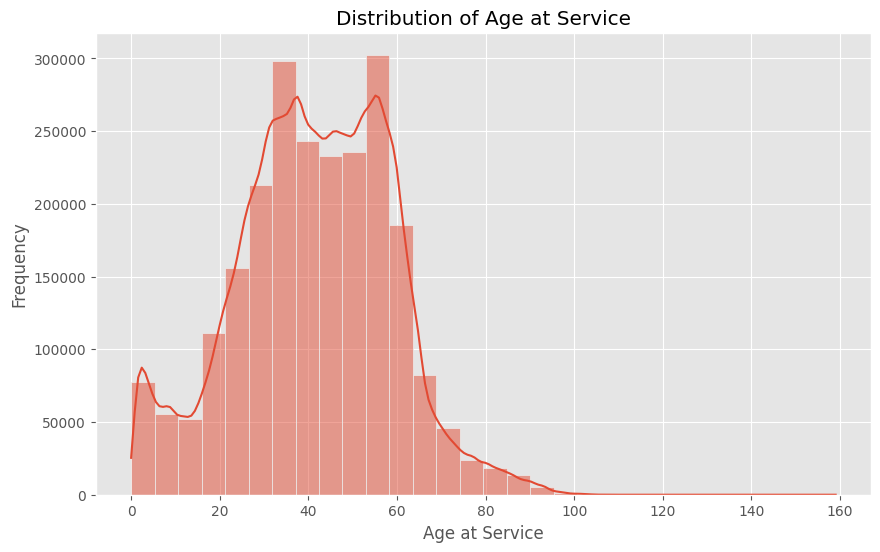

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(transactional['Age_at_service'], bins=30, kde=True)
plt.title('Distribution of Age at Service')
plt.xlabel('Age at Service')
plt.ylabel('Frequency')
plt.show()


## Exams

Informações a respeito dos exames, características como custo de aplicação e outras especificações técnicas

In [16]:
exams.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(10)

,column_name,null_count
0,CodItem,0
1,Desc Item,0
2,Category,0
3,Family,0
4,Speciality,0
5,Testing Cost,0


In [17]:
print(exams.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodItem       2002 non-null   int64  
 1   Desc Item     2002 non-null   object 
 2   Category      2002 non-null   object 
 3   Family        2002 non-null   object 
 4   Speciality    2002 non-null   object 
 5   Testing Cost  2002 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.0+ KB
None


In [18]:
exams.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


#### Testing Cost

In [19]:
exams['Testing Cost'].describe()

count   2002.00
mean      77.77
std      146.07
min        0.00
25%        4.81
50%       21.19
75%       79.27
max     1762.46
Name: Testing Cost, dtype: float64

In [20]:
exams.sort_values('Testing Cost', ascending=True).head(10)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1978,70006899,DERIVADO - DOPPLER VASOS CERVICAIS ART,RID,ULTRASOUND,DOPPLER,0.00
343,70006810,TC MATERIAIS/MEDICAMENTOS,RID,CT SCAN,MAT / MED,0.00
1877,70006910,DERIVADO - DOPPLER ABDOME SUPERIOR,RID,ULTRASOUND,DOPPLER,0.00
1536,70001660,"PROLACTINA (BASAL DE PROVA), SORO",CA,CORELAB,IMMUNOHORMONE,0.00
1860,70006904,DERIVADO - DOPPLER TIREOIDE,RID,ULTRASOUND,DOPPLER,0.00
187,70006809,RM MATERIAIS/MEDICAMENTOS,RID,MRI,MAT / MED,0.00
818,70002489,VOLUME URINARIO,CA,CORELAB,BIOCHEMISTRY,0.00
1906,70000207,"LEUCOGRAMA APOS CAFE, SANGUE",CA,HEMATO,BLOOD COUNT,0.01
1728,70000084,"CLEARANCE DE CREATININA, URINA DE 12 HORAS/SORO",CA,CORELAB,BIOCHEMISTRY,0.17
1236,70001540,TESTE DE ABSORCAO DE TRIGLICERIDES (SOBRECARGA),CA,CORELAB,BIOCHEMISTRY,0.20


Dando uma olhada nas descrições e dando uma procurada no google, fica claro que nao faz sentido esses exames custarem 0 então certamente houve algum erro de digitação ou de formatação, vou decidir oque fazer com esses valores depois

In [21]:
exams.sort_values('Testing Cost', ascending=False).head(10) 

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1995,70006589,"DETECCAO, TRISSOMIAS FETAIS 21, 18, 13 E MICRO...",CA,GENETICS,SPECIAL GENETICS,1762.46
1925,70003713,"EXOMA COMPLETO, SEQUENCIAMENTO (NGS), SANGUE",CA,GENETICS,SPECIAL GENETICS,1490.77
1007,70004827,"MICOBACTERIAS (BAAR), LCR, CULTURA",CA,MICROBIO,MYCOLOGY,1320.21
1579,70002005,MAMOTOMIA POR ESTEREOTAXIA (NAO INCLUI O EXAME...,RID,MAMMO,INVASIVE PROCEDURE,1257.58
434,70005603,CINTILOGRAFIA MIOCARDIO REPOUSO/ESFORCO,RID,INTERNAL,SCINTILOGRAPHY,1246.47
1923,70002449,"DETECCAO, TRISSOMIAS 21, 18, 13 E MONOSSOMIA D...",CA,GENETICS,SPECIAL GENETICS,1216.64
1278,70008011,"ARRITMIA CARD¡ACA, PAINEL GERAL, SEQUENCIAMENT...",CA,GENETICS,SPECIAL GENETICS,1178.19
1316,70008015,"RASOPATIAS (NOONAN, LEOPARD, COSTELLO), SEQUEN...",CA,GENETICS,SPECIAL GENETICS,1018.45
878,70001320,"MYCOPLASMA PNEUMONIAE, PESQUISA, DIVERSOS (XXX...",CA,GENETICS,BIOMOLECULAR,986.69
1279,70003618,"SINDROME DE NOONAN, PAINEL, SEQUENCIAMENTO (NG...",CA,GENETICS,SPECIAL GENETICS,968.32


É congruente com as outras informações de que os exames de genetica sejem realmente caros assim.

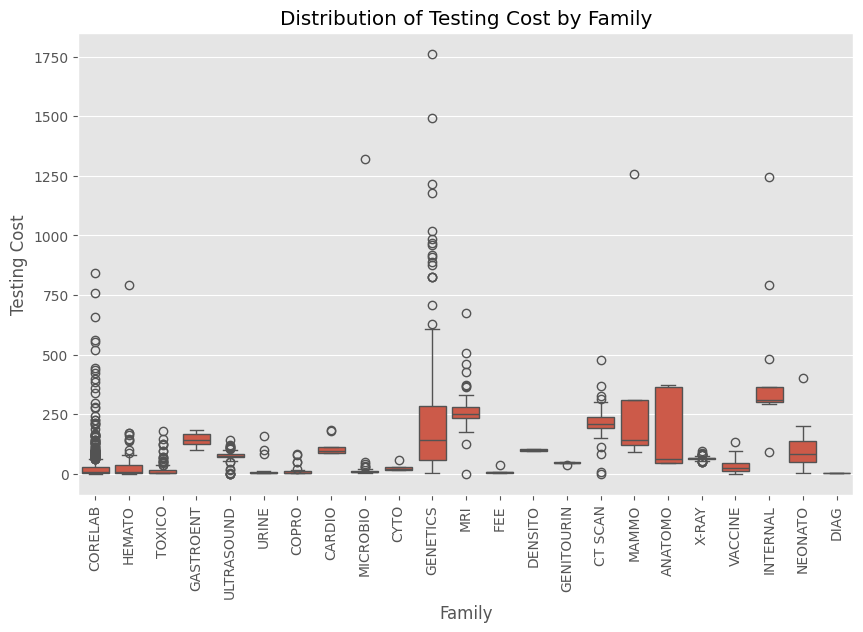

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family', y='Testing Cost', data=exams)
plt.title('Distribution of Testing Cost by Family')
plt.xlabel('Family')
plt.ylabel('Testing Cost')
plt.xticks(rotation=90)
plt.show()

É possivel perceber que as familias de exame "Genetics" e "Corelab" são as que mais tem exames com preços discrepantes

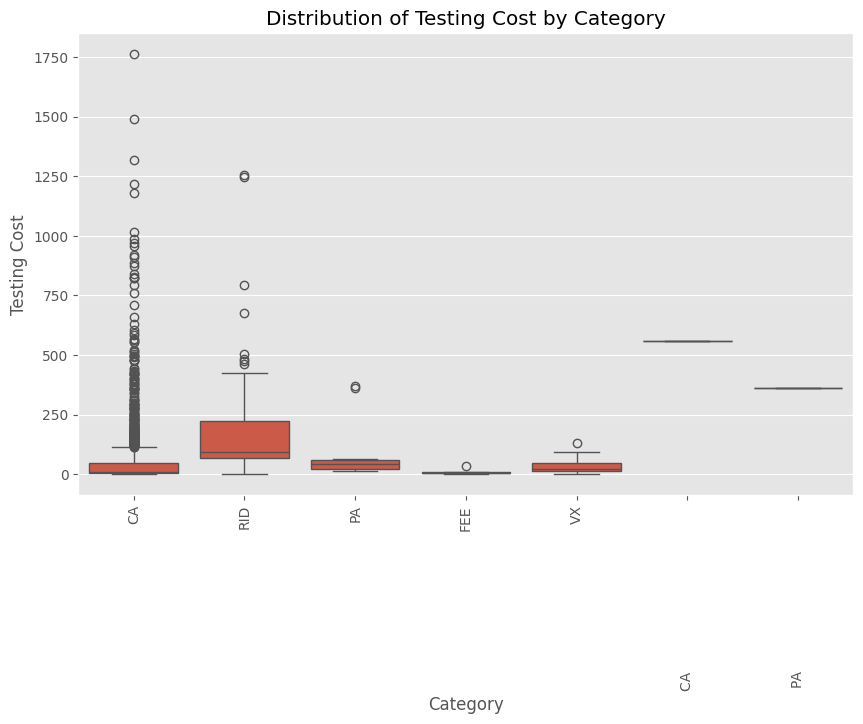

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Testing Cost', data=exams)
plt.title('Distribution of Testing Cost by Category')
plt.xlabel('Category')
plt.ylabel('Testing Cost')
plt.xticks(rotation=90)
plt.show()

#### Correlação com o testing cost do transactional

In [24]:
most_expensive_exams = [70003713, 70008010, 70008011, 70008012, 70008013, 70007907, 70003490, 70008014, 70008017, 70008016]

exams[exams['CodItem'].isin(most_expensive_exams)]

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
840,70007907,"FIBROSE CISTICA, SEQUENCIAMENTO COMPLETO, (NGS...",CA,GENETICS,SPECIAL GENETICS,568.87
953,70003490,"FISH PAINEL PARA LLC, SANGUE/MEDULA",CA,GENETICS,SPECIAL GENETICS,186.22
1278,70008011,"ARRITMIA CARD¡ACA, PAINEL GERAL, SEQUENCIAMENT...",CA,GENETICS,SPECIAL GENETICS,1178.19
1314,70008016,"S¡NDROME DO QT LONGO, PAINEL AMPLIADO, SEQUENC...",CA,GENETICS,SPECIAL GENETICS,503.57
1315,70008017,"S¡NDROME DO QT CURTO, SEQUENCIAMENTO (NGS), SA...",CA,GENETICS,SPECIAL GENETICS,417.09
1318,70008012,"MIOCARDIOPATIA HIPERTR¢FICA, PAINEL AMPLIADO, ...",CA,GENETICS,SPECIAL GENETICS,919.62
1319,70008013,"MIOCARDIOPATIA DILATADA, SEQUENCIAMENTO (NGS),...",CA,GENETICS,SPECIAL GENETICS,708.06
1320,70008014,"MIOCARDIOPATIA ARRITMOGNICA, SEQUENCIAMENTO (...",CA,GENETICS,SPECIAL GENETICS,267.72
1323,70008010,"MIOCARDIOPATIAS, PAINEL GERAL, SEQUENCIAMENTO ...",CA,GENETICS,SPECIAL GENETICS,605.36
1925,70003713,"EXOMA COMPLETO, SEQUENCIAMENTO (NGS), SANGUE",CA,GENETICS,SPECIAL GENETICS,1490.77


Por algum motivo que os especialistas da area podem explicar, os exames da familia "genetica" são os mais caros, informação util para se manter em mente

In [25]:
least_expensive_exams = [70007618, 70007619, 70007626, 70007623, 70007622, 70007621, 70007750, 70007629, 70007628, 70008046]

exams[exams['CodItem'].isin(least_expensive_exams)]

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1643,70007621,"GENE PTPN11, ESTUDO MOLECULAR SINDROME NOONAN,...",CA,GENETICS,SPECIAL GENETICS,376.81
1646,70007629,"GENE VHL, SINDROME VON HIPPEL-LINDAU, SEQUENCI...",CA,GENETICS,SPECIAL GENETICS,330.23
1652,70007619,"GENE DMD, DISTROFIA MUSCULAR DUCHENNE/BECKER, ...",CA,GENETICS,SPECIAL GENETICS,376.67
1661,70007750,"OSTEOGENESE IMPERFEITA, PAINEL, SEQUENCIAMENTO...",CA,GENETICS,SPECIAL GENETICS,404.34
1673,70007622,"GENE RAF1, ESTUDO MOLECULAR SINDROME NOONAN, S...",CA,GENETICS,SPECIAL GENETICS,138.92
1674,70007618,"GENE BBS1, SINDROME BARDET BIEDL, SEQUENCIAMEN...",CA,GENETICS,SPECIAL GENETICS,25.57
1679,70007623,"GENE SOS1, ESTUDO MOLECULAR SINDROME NOONAN, S...",CA,GENETICS,SPECIAL GENETICS,298.46
1684,70007626,"GENE NRAS, ANALISE DE MUTAAO, PCR E SEQUENCIA...",CA,GENETICS,SPECIAL GENETICS,220.76
1685,70007628,"GENE IKAROS, MLPA, SANGUE/MEDULA",CA,GENETICS,SPECIAL GENETICS,131.78
1686,70008046,"PESQUISA DE MUTACAO V600E PARA O GENE BRAF, PC...",CA,GENETICS,SPECIAL GENETICS,75.34


## Demographic

Dados demográficos relevantes a nível de ZCTAs (Zip code tabulation area)

In [26]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       33120 non-null  int64  
 1   Id                               33120 non-null  object 
 2   GeographicAreaName               33120 non-null  object 
 3   TotalPopulation                  33120 non-null  int64  
 4   SexRatio(males per 100 females)  32620 non-null  float64
 5   Population_Under5Years           33120 non-null  int64  
 6   Population_5to9Years             33120 non-null  int64  
 7   Population_10to14Years           33120 non-null  int64  
 8   Population_15to19Years           33120 non-null  int64  
 9   Population_20to24Years           33120 non-null  int64  
 10  Population_25to34Years           33120 non-null  int64  
 11  Population_35to44Years           33120 non-null  int64  
 12  Population_45to54Y

In [27]:
demographic.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(10)

,column_name,null_count
18,MedianAgeInYears,569
4,SexRatio(males per 100 females),500
0,Unnamed: 0,0
2,GeographicAreaName,0
1,Id,0
5,Population_Under5Years,0
3,TotalPopulation,0
7,Population_10to14Years,0
8,Population_15to19Years,0
9,Population_20to24Years,0


In [28]:
demographic.head()

,Unnamed: 0,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0,8600000US35004,ZCTA5 35004,12045,94.10,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.50
1,1,8600000US35005,ZCTA5 35005,7344,86.10,504,453,511,499,214,788,795,968,612,561,798,485,156,44.00
2,2,8600000US35006,ZCTA5 35006,2883,108.20,96,153,303,129,156,183,367,430,296,260,280,201,29,47.20
3,3,8600000US35007,ZCTA5 35007,26332,95.00,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.70
4,4,8600000US35010,ZCTA5 35010,20613,90.50,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.60


A coluna GeographicAreaName devera ser tratada para representar o ZCTA apenas com numeros

### Median Age In Years

Nessa colunas temos alguns valores faltantes mas podemos preenche-los usando as outras colunas de idade

In [29]:
# Eu posso preencher os valores faltantes da coluna MedianAgeInYears com a media das outras colunas de idade
def fill_missing_median_age(df):
    age_midpoints = {
        'Population_Under5Years': 2.5,
        'Population_5to9Years': 7,
        'Population_10to14Years': 12,
        'Population_15to19Years': 17,
        'Population_20to24Years': 22,
        'Population_25to34Years': 29.5,
        'Population_35to44Years': 39.5,
        'Population_45to54Years': 49.5,
        'Population_55to64Years': 59.5,
        'Population_65to74Years': 69.5,
        'Population_75to84Years': 79.5,
        'Population_85YearsAndOver': 90
    }

    def estimate_median_age(row):
        total = 0
        population_sum = 0
        for col, midpoint in age_midpoints.items():
            count = row.get(col, 0)
            count = 0 if pd.isna(count) else count
            total += count * midpoint
            population_sum += count
        return total / population_sum if population_sum != 0 else np.nan

    df['MedianAgeInYears'] = df['MedianAgeInYears'].fillna(df.apply(estimate_median_age, axis=1))
    return df


demographic = fill_missing_median_age(demographic)

demographic.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(20)

,column_name,null_count
4,SexRatio(males per 100 females),500
18,MedianAgeInYears,384
0,Unnamed: 0,0
2,GeographicAreaName,0
1,Id,0
5,Population_Under5Years,0
3,TotalPopulation,0
7,Population_10to14Years,0
8,Population_15to19Years,0
9,Population_20to24Years,0


As colunas que continuaram com um valor nulo depois do preenchimento foram as que tinham uma população de 0, o que não faz sentido, então vou examinar esses casos e ver o que fazer

### Gender

In [30]:
demographic['SexRatio(males per 100 females)'].describe()


count    32620.00
mean       116.84
std       1483.16
min          0.50
25%         91.30
50%         98.40
75%        107.90
max     265600.00
Name: SexRatio(males per 100 females), dtype: float64

Claramente existem valores que não fazem sentido e vou decidir como tratar deles depois

### Total Population

In [31]:
demographic['TotalPopulation'].describe()

count    33120.00
mean      9903.34
std      14714.04
min          0.00
25%        705.75
50%       2801.00
75%      13475.25
max     128294.00
Name: TotalPopulation, dtype: float64

In [32]:
demographic.sort_values('TotalPopulation', ascending=True).head(10)

,Unnamed: 0,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
2362,2362,8600000US92338,ZCTA5 92338,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
12005,12005,8600000US04644,ZCTA5 04644,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
11996,11996,8600000US04629,ZCTA5 04629,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
15304,15304,8600000US39269,ZCTA5 39269,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
13265,13265,8600000US48143,ZCTA5 48143,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
27712,27712,8600000US75858,ZCTA5 75858,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
15274,15274,8600000US39167,ZCTA5 39167,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4746,4746,8600000US32432,ZCTA5 32432,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4722,4722,8600000US32356,ZCTA5 32356,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
28342,28342,8600000US77454,ZCTA5 77454,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


Será necessario investigar essas linhas com população = 0 depois, talver tentar cruzar com algum dado dos geocodes para descobrir

## Geocodes

Informações  a  respeito  da  localização  de  cada  um dos  laboratórios,  como  endereço,  lat-long,  e  o  ZCTA no  qual  o 
laboratório se encontra

In [33]:
geocodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  119 non-null    int64  
 1   Lab Id      119 non-null    object 
 2   Address     119 non-null    object 
 3   Location    119 non-null    object 
 4   Zipcode     118 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ KB


In [34]:
geocodes = geocodes.drop(columns=['Unnamed: 0'])
geocodes.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.00
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.00
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.00
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.00
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.00


In [35]:
geocodes.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(10)

,column_name,null_count
3,Zipcode,1
0,Lab Id,0
1,Address,0
2,Location,0


### Zipcode

In [36]:
geocodes[geocodes['Zipcode'].isnull()]

,Lab Id,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


Como é apenas um caso isolado, provavelmente vou remover essa linha no futuro

In [37]:
geocodes['Zipcode'].describe()

count     118.00
mean    47422.31
std     37504.81
min      1605.00
25%     13440.25
50%     30244.00
75%     94545.25
max     98383.00
Name: Zipcode, dtype: float64

Fora aquela unica linha, não há nada de estranho

## Economic

Dados econômicos relevantes a nível de ZCTAs (Zip code tabulation area)

In [38]:
economic.drop(columns=['Unnamed: 0', 'id'], inplace=True)
economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629280 entries, 0 to 629279
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Geographic Area Name                629280 non-null  object
 1   TotalHouseholds_LessThan$10.000     629280 non-null  int64 
 2   TotalHouseholds_$10.000to$14.999    629280 non-null  int64 
 3   TotalHouseholds_$15.000to$24.999    629280 non-null  int64 
 4   TotalHouseholds_$25.000to$34.999    629280 non-null  int64 
 5   TotalHouseholds_$35.000to$49.999    629280 non-null  int64 
 6   TotalHouseholds_$50.000to$74.999    629280 non-null  int64 
 7   TotalHouseholds_$75.000to$99.999    629280 non-null  int64 
 8   TotalHouseholds_$100.000to$149.999  629280 non-null  int64 
 9   TotalHouseholds_$150.000to$199.999  629280 non-null  int64 
 10  TotalHouseholds_$200.000OrMore      629280 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 5

In [39]:
economic.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(10)

,column_name,null_count
0,Geographic Area Name,0
1,TotalHouseholds_LessThan$10.000,0
2,TotalHouseholds_$10.000to$14.999,0
3,TotalHouseholds_$15.000to$24.999,0
4,TotalHouseholds_$25.000to$34.999,0
5,TotalHouseholds_$35.000to$49.999,0
6,TotalHouseholds_$50.000to$74.999,0
7,TotalHouseholds_$75.000to$99.999,0
8,TotalHouseholds_$100.000to$149.999,0
9,TotalHouseholds_$150.000to$199.999,0


In [40]:
# Valores unicos em cada coluna do dataset
economic.nunique().reset_index().rename(columns={0: 'unique_count', 'index': 'column_name'})\
    .sort_values('unique_count', ascending=False).head(10)

,column_name,unique_count
0,Geographic Area Name,33120
6,TotalHouseholds_$50.000to$74.999,3697
8,TotalHouseholds_$100.000to$149.999,3550
7,TotalHouseholds_$75.000to$99.999,2963
5,TotalHouseholds_$35.000to$49.999,2900
10,TotalHouseholds_$200.000OrMore,2640
3,TotalHouseholds_$15.000to$24.999,2387
4,TotalHouseholds_$25.000to$34.999,2341
9,TotalHouseholds_$150.000to$199.999,2212
1,TotalHouseholds_LessThan$10.000,1989


Apesar desse dataset ter mais de 600.000 linhas, oque nos interessa é apenas os ZCTAs e ter linhas com valores de ZCTAs duplicados só nos atrapalharia. Vou tratar isso posteriormente.

In [41]:
economic.head()

,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


Para simplificar a analise, vou criar a coluna MedianIncome, que é a mediana de todas as colunas de renda

In [42]:
def compute_median_household_income(df):
    income_midpoints = {
        'TotalHouseholds_LessThan$10.000': 5000,
        'TotalHouseholds_$10.000to$14.999': 12500,
        'TotalHouseholds_$15.000to$24.999': 20000,
        'TotalHouseholds_$25.000to$34.999': 30000,
        'TotalHouseholds_$35.000to$49.999': 42500,
        'TotalHouseholds_$50.000to$74.999': 62500,
        'TotalHouseholds_$75.000to$99.999': 87500,
        'TotalHouseholds_$100.000to$149.999': 125000,
        'TotalHouseholds_$150.000to$199.999': 175000,
        'TotalHouseholds_$200.000OrMore': 250000  # valor médio estimado
    }

    def estimate_income(row):
        total_income = 0
        household_sum = 0
        for col, midpoint in income_midpoints.items():
            count = row.get(col, 0)
            # Trata possíveis NaN como zero
            count = 0 if pd.isna(count) else count
            total_income += count * midpoint
            household_sum += count
        return total_income / household_sum if household_sum != 0 else np.nan

    df['MedianHouseholds'] = df.apply(estimate_income, axis=1)
    return df

economic = compute_median_household_income(economic)

economic.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(20)

,column_name,null_count
11,MedianHouseholds,11419
0,Geographic Area Name,0
2,TotalHouseholds_$10.000to$14.999,0
1,TotalHouseholds_LessThan$10.000,0
3,TotalHouseholds_$15.000to$24.999,0
4,TotalHouseholds_$25.000to$34.999,0
6,TotalHouseholds_$50.000to$74.999,0
5,TotalHouseholds_$35.000to$49.999,0
7,TotalHouseholds_$75.000to$99.999,0
8,TotalHouseholds_$100.000to$149.999,0


In [43]:
# Verificar a quantidade de 0s em cada coluna
economic.isin([0]).sum().reset_index().rename(columns={0: 'zero_count', 'index': 'column_name'})\
    .sort_values('zero_count', ascending=False).head(10)

,column_name,zero_count
10,TotalHouseholds_$200.000OrMore,132886
9,TotalHouseholds_$150.000to$199.999,114589
2,TotalHouseholds_$10.000to$14.999,88711
1,TotalHouseholds_LessThan$10.000,78014
8,TotalHouseholds_$100.000to$149.999,52630
3,TotalHouseholds_$15.000to$24.999,50217
4,TotalHouseholds_$25.000to$34.999,49761
7,TotalHouseholds_$75.000to$99.999,47291
5,TotalHouseholds_$35.000to$49.999,40812
6,TotalHouseholds_$50.000to$74.999,33744


Deu para perceber que apesar de nao ter dados nulos, há uma grande quantidade de zeros, oque levanta algumas suspeitas, Irei investigar mais a fundo nas transformações

# Transformações dos dados

Nesta parte haverá todas as transformações que eu fizer com os dados

## Transactional

Como só encontrei uma linha com uma coluna nula, vou remover todas as linhas que tiverem qualquer valor nulo

In [44]:
# Remover as colunas que tem algum valor nulo
transactional.dropna(inplace=True)

transactional.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(10)


,column_name,null_count
0,Patient Id,0
1,Gender,0
2,Date of birth,0
3,Date of service,0
4,Service Id,0
5,Lab Id,0
6,CodItem,0
7,Testing Cost,0
8,Age_at_service,0


#### Testing Cost

Por mais que os valores muito altos possam ser verdadeiros, eles são tao raros que não podem ser confiaveis para tomar alguma decisão ou fazer alguma inferencia, então vou remover eles 

Para nao remover muitos dados, optei por remover os dados que fazem parte dos 1% mais altos 

In [45]:
# Fazer com que a upper bound seja 0.99 
upper_bound = transactional['Testing Cost'].quantile(0.99)

print(f"Upper Bound: {upper_bound}")
# Remover os outliers
transactional = transactional[transactional['Testing Cost'] < upper_bound]


Upper Bound: 567.0


Já em relação aos 0s, ao olhar mais de perto com a o arquivo de exames, eu vi que a maioria deles tambem eram da familia genética, e tinham um custo bem acima do normal para serem feitos, entao isso indica que eles terem um custo de 0 é um erro, então vou remover eles também pois é impossivel estimar quanto eles custaram.

In [46]:
#printar porcentagem do dataset que tem testing cost == 0
porcentagem = (transactional['Testing Cost'] == 0).mean() * 100
print(f"{porcentagem:.2f}% dos registros possuem 'Testing Cost' igual a 0.")

#Dropar as linhas com Testing Cost == 0
transactional = transactional[transactional['Testing Cost'] != 0]

1.77% dos registros possuem 'Testing Cost' igual a 0.


#### Age at Service

Ao criar essa coluna, ficou bem evidente que havia algumas colunas com dados de datas estranhos, como por exemplo pessoas com mais de 160 anos fazendo exames

Para lidar com isso vou usar a mesma estrategia de remover as linhas que fazem partes dos 0,5% mais velhos do dataset

In [47]:
# Fazer com que a upper bound seja 0.99
upper_bound = transactional['Age_at_service'].quantile(0.995)
print(f"Upper Bound: {upper_bound}")

# Remover os outliers
transactional = transactional[transactional['Age_at_service'] < upper_bound]

Upper Bound: 88.0


## Exams

Como vou usar os valores de custo dos exames no futuro, preciso remover os outliers para não ter valores que distorçam a média

In [48]:
# Por isso vou remover os exames que tem os testing cost entre os 1% mais altos e os que tem o custo 0
upper_bound = exams['Testing Cost'].quantile(0.99)
print(f"Upper Bound: {upper_bound}")

lower_bound = 0
print(f"Lower Bound: {lower_bound}")

# Remover os outliers
exams = exams[(exams['Testing Cost'] < upper_bound) & (exams['Testing Cost'] > lower_bound)]


Upper Bound: 792.0062000000004
Lower Bound: 0


#### Lucro por exame 

Quero saber quanto cada exame lucra, então vou criar uma coluna com o lucro por exame, que é o preço do exame menos o custo do exame, não fiz antes pois ainda nao tinha tratado os valores na coluna de exames

In [49]:
transactional = transactional.merge(exams[['CodItem', 'Testing Cost']], on='CodItem', suffixes=('', '_ExamCost'))
transactional['LucroExame'] = transactional['Testing Cost'] - transactional['Testing Cost_ExamCost']

transactional['LucroExame'].describe()

count   2276202.00
mean         31.53
std          46.33
min        -141.35
25%           8.79
50%          14.98
75%          37.21
max         528.25
Name: LucroExame, dtype: float64

In [50]:
# remover as linhas com lucro negativo pois com certezas são erros 
transactional = transactional[transactional['LucroExame'] > 0]

transactional['LucroExame'].describe()

count   2237164.00
mean         32.64
std          45.87
min           0.10
25%           9.05
50%          14.98
75%          37.32
max         528.25
Name: LucroExame, dtype: float64

## Demographic


Primeira coisa a se fazer é transformar a coluna GeographicAreaName em uma coluna de numeros

#### Geographic Area Name

Como o objetivo final é encontrar ZCTAs onde devem ser construidos novos laboratorios, não faz sentido manter entradas que tem o ZCTA como nulo

In [51]:
# Dropar as linhas com GeographicAreaName nulo
demographic = demographic[demographic['GeographicAreaName'].notnull()]

In [52]:
# Dropanado colunas que nao serão utilizadas
demographic.drop(columns=['Unnamed: 0'], inplace=True)
demographic.drop(columns=['Id'], inplace=True)

In [53]:
# converter do tipo objeto para numerico
demographic['ZCTA'] = demographic['GeographicAreaName'].str.extract(r'ZCTA5 (\d+)').astype(int)

demographic.drop(columns=['GeographicAreaName'], inplace=True)


#### Valores zerados

In [54]:
# Verificar a quantidade de 0s em cada coluna
demographic.isin([0]).sum().reset_index().rename(columns={0: 'zero_count', 'index': 'column_name'})\
    .sort_values('zero_count', ascending=False).head(10)


,column_name,zero_count
14,Population_85YearsAndOver,4761
2,Population_Under5Years,3226
6,Population_20to24Years,3131
3,Population_5to9Years,3040
4,Population_10to14Years,2858
5,Population_15to19Years,2576
13,Population_75to84Years,2278
7,Population_25to34Years,1799
8,Population_35to44Years,1788
11,Population_60to64Years,1783


Apesar de algum dos dados realmente poderem ser 0, optei por remover as linhas que tem mais de 3 colunas com valor 0, pois isso indica que ou o dado nao é tao relevante ou ele é um erro de algum tipo

In [55]:
# Remover linhas que tem mais de 4 colunas com 0s
# 4 Foi um valor arbitrario escolhido
porcent_removida = demographic.shape[0] 
demographic = demographic[demographic.isin([0]).sum(axis=1) <= 4]

porcent_removida = 100 - (demographic.shape[0] / porcent_removida * 100)
print(f"Porcentagem de linhas removidas: {porcent_removida}%")

# Verificar a quantidade de 0s em cada coluna e mostrar o percentual de 0s
demographic.isin([0]).sum().reset_index().rename(columns={0: 'zero_count', 'index': 'column_name'})\
    .sort_values('zero_count', ascending=False).head(20)

Porcentagem de linhas removidas: 8.378623188405797%


,column_name,zero_count
14,Population_85YearsAndOver,2415
6,Population_20to24Years,1126
2,Population_Under5Years,952
3,Population_5to9Years,797
4,Population_10to14Years,701
5,Population_15to19Years,655
13,Population_75to84Years,538
11,Population_60to64Years,226
10,Population_55to59Years,208
7,Population_25to34Years,207


#### Sex Ratio

In [56]:
demographic.rename(columns={'SexRatio(males per 100 females)' : 'SexRatio'}, inplace=True)
demographic['SexRatio'].describe()

count   30340.00
mean      104.84
std       184.84
min        22.20
25%        91.70
50%        98.30
75%       107.00
max     25820.00
Name: SexRatio, dtype: float64

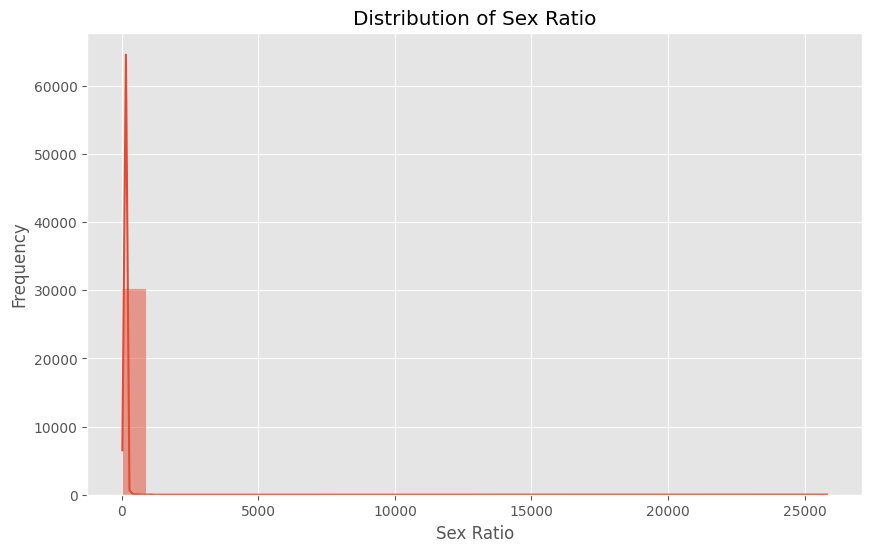

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(demographic['SexRatio'], bins=30, kde=True)
plt.title('Distribution of Sex Ratio')
plt.xlabel('Sex Ratio')
plt.ylabel('Frequency')
plt.show()


Com um dado que fala sobre a proporção de homens e mulheres, é impossivel acreditar q dados tao extremos como 0 e 500000 sejam verdadeiros, então vou remover esses dados, removendo os 1% mais extremos

In [58]:
# Remover os outliers da coluna SexRatio
lower_bound = demographic['SexRatio'].quantile(0.01)
upper_bound = demographic['SexRatio'].quantile(0.99)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

demographic = demographic[(demographic['SexRatio'] > lower_bound) & (demographic['SexRatio'] < upper_bound)]



Lower Bound: 65.43900000000001
Upper Bound: 185.76100000000005


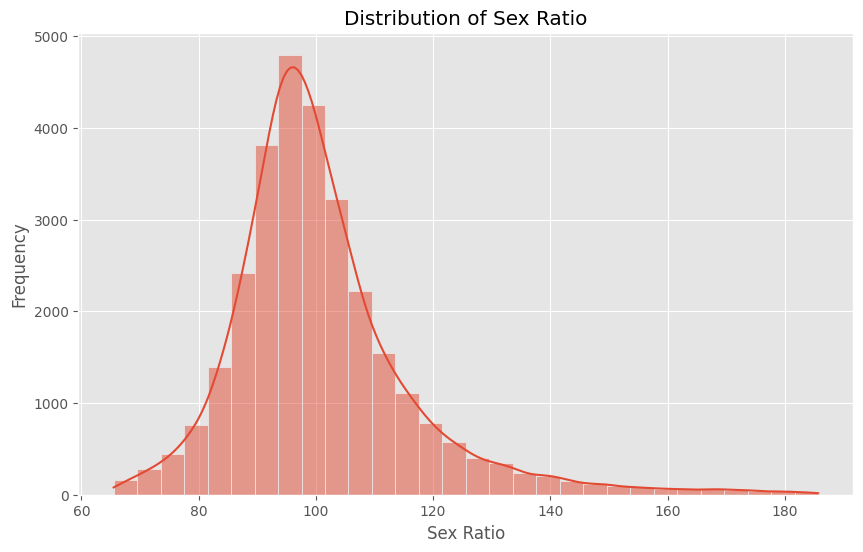

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(demographic['SexRatio'], bins=30, kde=True)
plt.title('Distribution of Sex Ratio')
plt.xlabel('Sex Ratio')
plt.ylabel('Frequency')
plt.show()


## Geocodes


Essa coluna também servirá apenas para cruzar dados, então vou apenas remover todas as linhas que tiverem algum valor nulo ja que eue so tinha achado uma assim na EDA

In [60]:
# Remover todas as linhas com algum valor nulo
n_removidas = geocodes.shape[0]
geocodes.dropna(inplace=True)

print(f"Quantidade de linhas removidas: {n_removidas - geocodes.shape[0]:.2f}%")

Quantidade de linhas removidas: 1.00%


## Economic


Aqui eu vou optar por fazer o mesmo processo de remover linhas com uma grande quantidade de 0s, pois isso indica que ou o dado nao é tao relevante ou ele é um erro de algum tipo

In [61]:
# Remover as linhas com mais de 3 colunas com 0s
# 3 Foi um valor arbitrario escolhido
porcent_removida = economic.shape[0]

economic = economic[economic.isin([0]).sum(axis=1) <= 3]

porcent_removida = 100 - (economic.shape[0] / porcent_removida * 100)
print(f"Porcentagem de linhas removidas: {porcent_removida:.2f}%")


Porcentagem de linhas removidas: 11.58%


Tambem devo fazer a transformação de ajustar a coluna Geographic Area Name para ser apenas números, assim como fiz com o dataset Demographic

In [62]:
# transforma a coluna Geographic Area Name em um valor numérico
economic['ZCTA'] = economic['Geographic Area Name'].str.extract(r'ZCTA5 (\d+)').astype(int)
economic.drop(columns=['Geographic Area Name'], inplace=True)

Por fim eu notei que tem muito mais linhas do q valores de ZCTAs unicos então eu vou agrupar os dados por ZCTA e pegar a média de cada coluna, assim evito de usar duplicatas

In [63]:
# Fazer com que não tenha duplicados na coluna ZCTA, para isso vou fazer a média dos valores das outras colunas
economic = economic.groupby('ZCTA').mean().reset_index()

In [64]:
print(economic.shape)

(29286, 12)


# Junção dos Datasets

### df_final

Aqui vou criar um novo dataset (df_final) que será um dataset com os ZTCAs e informações úteis que eu consegui extrair dos outros datasets

In [65]:
# Inicializar o df_final com as colunas 'ZCTA', 'TotalPopulation', 'MedianAgeInYears', 'SexRatio'  do arquivo demographic
df_final = demographic[['ZCTA', 'TotalPopulation', 'MedianAgeInYears', 'SexRatio']].copy()

df_final.head()

,ZCTA,TotalPopulation,MedianAgeInYears,SexRatio
0,35004,12045,35.50,94.10
1,35005,7344,44.00,86.10
2,35006,2883,47.20,108.20
3,35007,26332,37.70,95.00
4,35010,20613,42.60,90.50


In [66]:
# Agora usar o merge para juntar as colunas 'MedianHouseholds' do arquivo economic com o df_final
df_final = df_final.merge(economic[['ZCTA', 'MedianHouseholds']], on='ZCTA', how='left')

# Criar uma nova coluna chamada "TemLab" que vai ser 1 se no arquivo geocodes a coluna Zipcode coincidir com a coluna ZCTA do df_final e 0 caso contrario
df_final['TemLab'] = df_final['ZCTA'].isin(geocodes['Zipcode']).astype(int)

# E iremos dropar as linhas que ja tem laboratorios pois não faz sentido ter um laboratório em uma região que ja tem um
df_final = df_final[df_final['TemLab'] == 0]
df_final.drop(columns=['TemLab'], inplace=True)

# Ao inves de SexRatio, eu vou dividr o valor da coluna SexRatio por 100 e assim terei a proporção de homens para mulheres
df_final['SexRatio'] = df_final['SexRatio'] / 100

In [67]:
df_final

,ZCTA,TotalPopulation,MedianAgeInYears,SexRatio,MedianHouseholds
0,35004,12045,35.50,0.94,74194.42
1,35005,7344,44.00,0.86,60726.73
2,35006,2883,47.20,1.08,68158.15
3,35007,26332,37.70,0.95,81781.91
4,35010,20613,42.60,0.91,59097.60
...,...,...,...,...,...
29727,979,16130,48.70,0.92,54244.85
29728,982,14346,44.80,0.81,31723.35
29729,983,33947,40.80,0.81,35522.62
29730,985,31682,43.60,0.82,34163.86


### df_labs

Com o dataset final pronto, agora eu vou fazer uma analise mais profunda usando os outros datasets para tentar entender qual laboratorio já existente é o mais lucrativo

In [ ]:
# Inciar o df_labs com a coluna labId cada valor unico de lab id do dataset transactional
df_labs = pd.DataFrame(transactional['Lab Id'].unique(), columns=['Lab Id'])

# Criar uma nova coluna chamada "TotalExams" que vai ser a quantidade de exames por labId
df_labs['TotalExams'] = transactional.groupby('Lab Id')['CodItem'].count().values

# Criar uma coluna "MeanAge" que vai ser a média de idade dos pacientes por labId
df_labs['Idade_no_Exame_Media'] = transactional.groupby('Lab Id')['Age_at_service'].mean().values

# Criar uma coluna "MedianTestingCost" que vai ser a mediana do custo dos exames por labId
df_labs['PrecoMedioExame'] = transactional.groupby('Lab Id')['Testing Cost'].median().values

# Criar uma coluna Lucro no dataset transactional que vai ser a diferença entre o Testing Cost e o testing cost da tabela exams
transactional['Lucro'] = transactional['Testing Cost'] - exams.set_index('CodItem').loc[transactional['CodItem'], 'Testing Cost'].values

# Criar uma coluna "LucroTotal" que vai ser o lucro total por labId
df_labs['LucroTotal'] = transactional.groupby('Lab Id')['LucroExame'].sum().values

# Adicionar a coluna zipcode do no df_labs usando o df geocodes
df_labs = df_labs.merge(geocodes[['Lab Id', 'Zipcode']], on='Lab Id', how='left')

# Dropar as linhas com zipcode nulo
df_labs = df_labs[df_labs['Zipcode'].notnull()]
# Transformar a coluna Zipcode em int   
df_labs['Zipcode'] = df_labs['Zipcode'].astype(int)


In [81]:
# null values 
df_labs.isnull().sum().reset_index().rename(columns={0: 'null_count', 'index': 'column_name'})\
    .sort_values('null_count', ascending=False).head(10)

,column_name,null_count
5,Zipcode,2
0,Lab Id,0
1,TotalExams,0
2,Idade_no_Exame_Media,0
3,PrecoMedioExame,0
4,LucroTotal,0


In [70]:
df_labs.sort_values('LucroTotal', ascending=False).head(20)

,Lab Id,TotalExams,Idade_no_Exame_Media,PrecoMedioExame,LucroTotal,Zipcode,ZCTA,TotalPopulation,MedianAgeInYears,SexRatio,MedianHouseholds
28,L540,111055,42.90,30.00,4608274.93,30189,NaN,NaN,NaN,NaN,NaN
32,L155,87195,44.73,31.00,3749925.00,94513,NaN,NaN,NaN,NaN,NaN
19,L536,81972,41.69,35.00,3599465.96,30338,NaN,NaN,NaN,NaN,NaN
41,L170,88354,42.61,31.00,3242862.70,3079,NaN,NaN,NaN,NaN,NaN
21,L525,62952,42.95,31.00,2953324.82,19140,NaN,NaN,NaN,NaN,NaN
55,L065,72364,36.63,24.00,2623641.16,52761,NaN,NaN,NaN,NaN,NaN
44,L120,51829,40.40,26.00,2406937.19,19106,NaN,NaN,NaN,NaN,NaN
45,L064,64950,40.17,26.00,2337467.00,30012,NaN,NaN,NaN,NaN,NaN
96,L172,70443,41.37,33.00,2306451.32,30281,NaN,NaN,NaN,NaN,NaN
34,L522,48817,41.01,31.00,1740964.31,1702,NaN,NaN,NaN,NaN,NaN


# O erro de merge acima surgiu minutos antes de eu enviar o desafio e nao consegui corrigir a tempo, entrentanto o arquivo .py funciona normalmente e retorna os resultados esperados

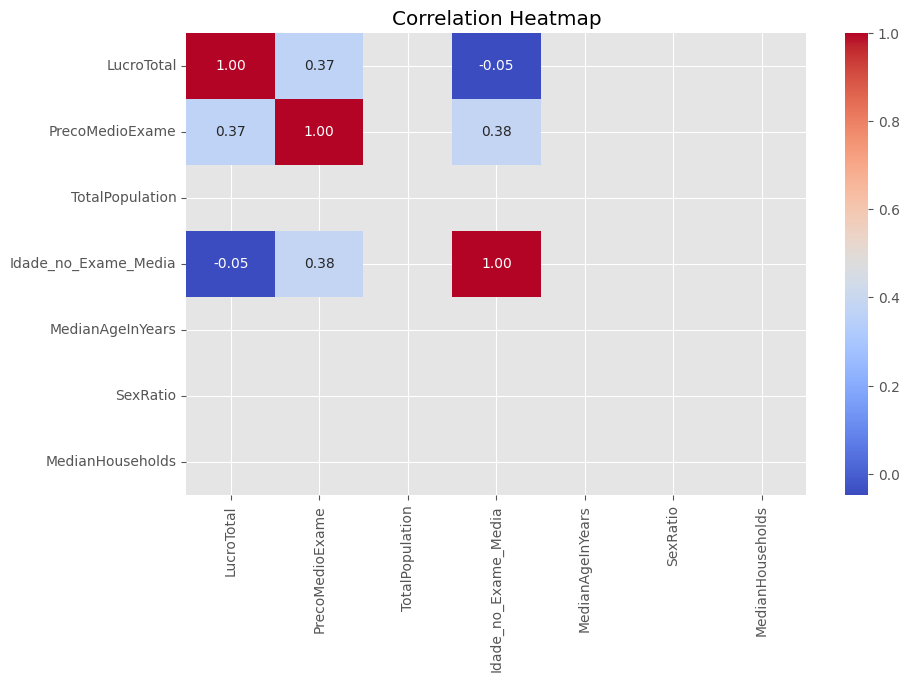

In [71]:
# Mostrar a correlação da coluna LucroTotal com as colunas PrecoMedioExame TotalPopulation Idade_no_Exame_Media MedianAgeInYears e SexRatio
correlation = df_labs[['LucroTotal', 'PrecoMedioExame', 'TotalPopulation', 'Idade_no_Exame_Media', 'MedianAgeInYears', 'SexRatio', 'MedianHouseholds']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

Com o gráfico acima podemos perceber que o Income medio de um ZCTA não impacta tanto no lucro de um laboratorio e nem a idade media da população ou a idade média dos pacientes mas oque realmnete tem um impacto significativo é a quantidade de pessoas que moram ali e também a proporção de homens e mulheres, oque faz sentido pois a maioria dos exames são feitos por mulheres como vimos na EDA.

A estratégia que eu vou usar então vai ser de me basear na quantidade de pessoas que moram em um dado ZCTA e multiplicar essa quantidade pela proporção de homens e mulheres, e depois pela proporção de quantos exames feitos por mulheres.

In [72]:
# Calcula a porcentagem de cada gênero
percentuais = transactional['Gender'].value_counts(normalize=True) * 100

# Salva os percentuais em variáveis distintas
pct_homens = percentuais['M']
pct_mulheres = percentuais['F']

print("Porcentagem de homens:", pct_homens)
print("Porcentagem de mulheres:", pct_mulheres)

fator_genero = pct_mulheres / pct_homens
print("Fator de exames por genero:", fator_genero)


Porcentagem de homens: 36.33135523367979
Porcentagem de mulheres: 63.66864476632021
Fator de exames por genero: 1.7524434295613143


In [73]:
# Usandoa populacao / sexRatio * fator_genero, vou calcular um valor que me indicará qual ZCTA tem mais chance de me gerar mais lucro
df_final['Índice de Potencial Econômico'] = (df_final['TotalPopulation'] / df_final['SexRatio']) * fator_genero

# Ordenar o df_final pelo índice de potencial econômico
df_final = df_final.sort_values('Índice de Potencial Econômico', ascending=False)

df_final.head(10)

,ZCTA,TotalPopulation,MedianAgeInYears,SexRatio,MedianHouseholds,Índice de Potencial Econômico
25610,77449,128294,31.70,0.92,88730.74,245713.64
17267,11236,100844,38.00,0.77,85715.29,229510.92
25638,77494,118291,35.20,0.94,144563.02,221236.16
17258,11226,99558,34.50,0.85,74166.67,204536.65
26438,79936,111620,31.80,0.96,68605.77,203123.30
17240,11208,101313,32.30,0.88,59980.41,201756.02
6203,60629,110029,31.20,0.96,59286.26,201273.07
17239,11207,91083,35.20,0.80,57661.66,200022.31
24739,75034,108525,36.80,0.95,131336.65,199563.40
24764,75070,104415,37.10,0.92,116467.41,199326.12


Portanto os 3 ZTCAs escolhidos serão:
* ZCTA 77449
* ZCTA 11236
* ZCTA 77494